## Predicting the profit of startups using Simple Linear Regression

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [25]:
#Linear model 
from sklearn.linear_model import LinearRegression
#Data Spliting 
from sklearn.model_selection import train_test_split

In [26]:
#Read Csv file
df = pd.read_csv("csv files/50_Startups.csv")

In [27]:
#Top Row Data Analysis 
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
# Bottom row data analysis
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [29]:
#Data Analysis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [30]:
# Print Mathematics Description 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
PROFIT,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [31]:
# Looking for missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [32]:
# find correlation between the features 

In [33]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [42]:
# Divide the data into "Attributes" and "Labels"
#x =df[['RND']] 

X =df[['MKT']] 

y =df["PROFIT"]

In [43]:
type(y)

pandas.core.series.Series

In [44]:
#Split 70% of the data to the training set while 30% of the data to set set .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=4)

In [45]:
X_train

,MKT
22,303319.26
28,118148.20
33,214634.81
15,261776.23
16,264346.06
27,353183.81
37,197029.42
20,298664.47
24,140574.81
47,0.00


In [46]:
X

,MKT
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42
5,362861.36
6,127716.82
7,323876.68
8,311613.29
9,304981.62


In [47]:
y_train

22    110352.25
28    103282.38
33     96778.92
15    129917.04
16    126992.93
27    105008.31
37     89949.14
20    118474.03
24    108552.04
47     42559.73
13    134307.35
10    146121.95
19    122776.86
29    101004.64
42     71498.49
45     64926.08
26    105733.54
32     97427.84
17    125370.37
44     65200.33
34     96712.80
14    132602.65
2     191050.39
43     69758.98
35     96479.51
21    111313.02
0     192261.83
3     182901.99
38     81229.06
36     90708.19
49     14681.40
30     99937.59
39     81005.76
9     149759.96
8     152211.77
23    108733.99
40     78239.91
1     191792.06
5     156991.12
46     49490.75
Name: PROFIT, dtype: float64

In [48]:
y_test

6     156122.51
48     35673.41
11    144259.40
4     166187.94
12    141585.52
31     97483.56
7     155752.60
25    107404.34
41     77798.83
18    124266.90
Name: PROFIT, dtype: float64

In [49]:
X_train.shape

(40, 1)

In [50]:
X_test.shape

(10, 1)

In [51]:
y_test.shape

(10,)

In [52]:
y_train.shape

(40,)

In [53]:
#Creating a Linear Regression Model and Fit it 
lin_model = LinearRegression(fit_intercept = True)
lin_model.fit(X_train, y_train)

LinearRegression()

In [166]:
#Results 
print("Linear Model Coeff (m)", lin_model.coef_)
print("Linear model Intercept (b)", lin_model.intercept_)

Linear Model Coeff (m) [[0.24186079]]
Linear model Intercept (b) [58164.72985833]


In [167]:
#Predicting the Data 
y_predict = lin_model.predict(X_test)

In [168]:
x_pred = lin_model.predict(X_train)

In [169]:
lin_model.score(X_test,y_test)

0.4817816648169404

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

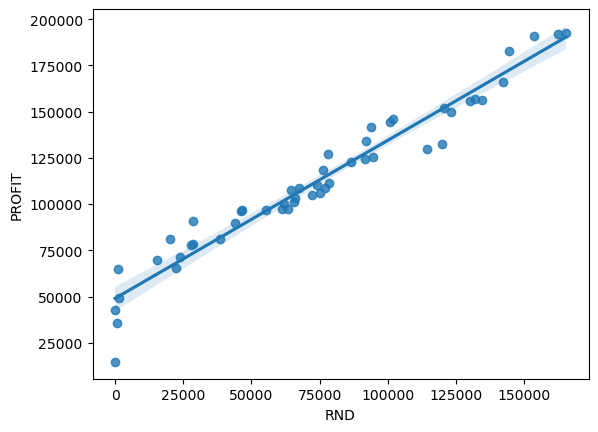

In [170]:
#Visualize
sns.regplot(df.RND, df.PROFIT)

Text(0.5, 1.0, 'PROFIT VS RND (Training)')

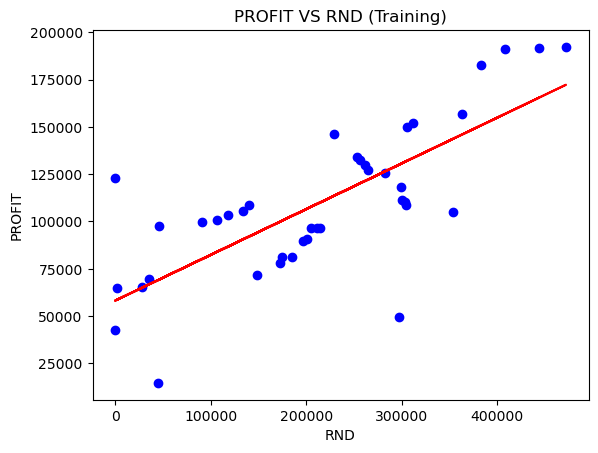

In [171]:
#Scatterplot on Training Data 

plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, lin_model.predict(X_train), color="red")
plt.ylabel("PROFIT")
plt.xlabel("RND")
plt.title("PROFIT VS RND (Training)")

Text(0.5, 1.0, 'PROFIT VS RND (Testing)')

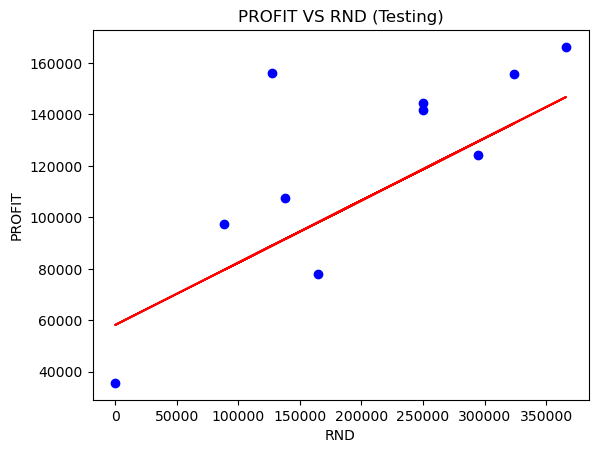

In [172]:
#Scatterplot on Test Data 

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, lin_model.predict(X_test), color="red")
plt.ylabel("PROFIT")
plt.xlabel("RND")
plt.title("PROFIT VS RND (Testing)")

In [173]:
# Predicting Value of Profit at RND = 165349.20
RND = 165349.20
coef  = lin_model.coef_
intercept =  lin_model.intercept_
print(coef)
print(intercept)

[[0.24186079]]
[58164.72985833]


In [174]:
#using Formula 
import numpy as np
Y = coef*165349.20 + intercept
print("Predicted Value of print at RND= 165349.20 is :",Y)

Predicted Value of print at RND= 165349.20 is : [[98156.21819115]]


In [175]:
X =df[['ADMIN']] 

y =df[['MKT']]

In [176]:
#Split 80% of the data to the training set while 20% of the data to set set .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=4)

In [177]:
X_test

,ADMIN
6,147198.87
48,51743.15
11,91790.61
4,91391.77
12,127320.38
31,152701.92
7,145530.06
25,139553.16
41,84710.77
18,114175.79


In [178]:
X_train

,ADMIN
22,122782.75
28,182645.56
33,103057.49
15,122616.84
16,121597.55
27,127864.55
37,51283.14
20,113867.30
24,99281.34
47,135426.92


In [179]:
y_test

,MKT
6,127716.82
48,0.00
11,249744.55
4,366168.42
12,249839.44
31,88218.23
7,323876.68
25,137962.62
41,164470.71
18,294919.57


In [180]:
y_train

,MKT
22,303319.26
28,118148.20
33,214634.81
15,261776.23
16,264346.06
27,353183.81
37,197029.42
20,298664.47
24,140574.81
47,0.00


In [181]:
#Creating a Linear Regression Model and Fit it 
reg = LinearRegression(fit_intercept = True)
reg.fit(X_train, y_train)

LinearRegression()

In [182]:
#Results 
print("Linear Model Coeff (m)",reg.coef_)
print("Linear model Intercept (b)", reg.intercept_)

Linear Model Coeff (m) [[-0.40396027]]
Linear model Intercept (b) [263406.82487296]


In [183]:
#Predicting the Data 
y_predict = reg.predict(X_test)

In [184]:
reg.score(X_test,y_test)

-0.07054127323190262

In [185]:
##ADMIN Vs MKT

<AxesSubplot:xlabel='ADMIN', ylabel='MKT'>

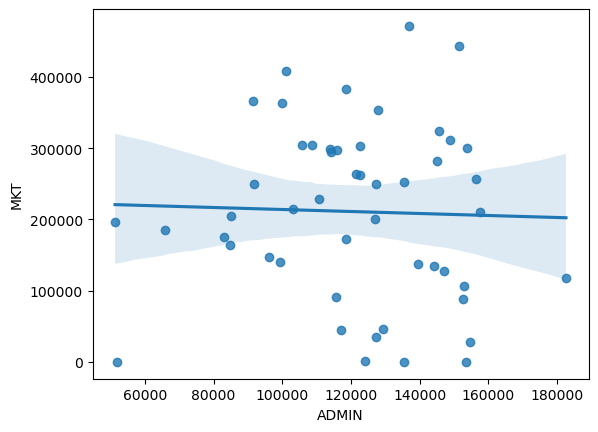

In [186]:
#Visualize
sns.regplot(df.ADMIN, df.MKT)

Text(0.5, 1.0, 'MKT VS ADMIN (Training)')

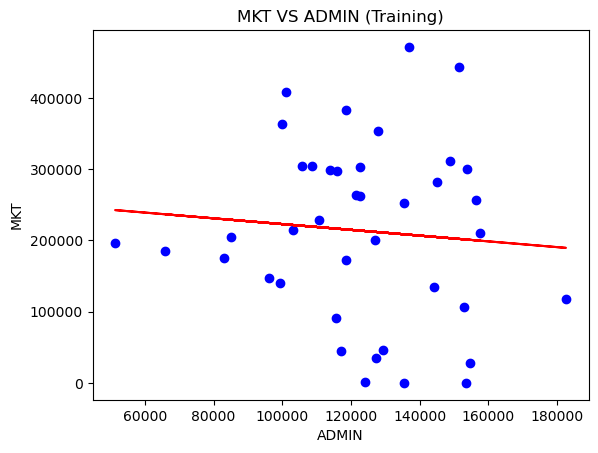

In [187]:
#Scatterplot on Training Data  of admin and mkt

plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, reg.predict(X_train), color="red")
plt.ylabel("MKT")
plt.xlabel("ADMIN")
plt.title("MKT VS ADMIN (Training)")

Text(0.5, 1.0, 'MKT VS ADMIN (Testing)')

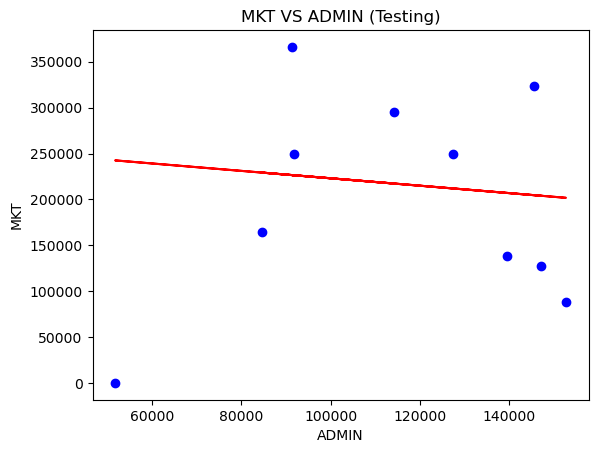

In [188]:
#Scatterplot on Test Data 

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, reg.predict(X_test), color="red")
plt.ylabel("MKT")
plt.xlabel("ADMIN")
plt.title("MKT VS ADMIN (Testing)")

In [189]:
# Predicting Value of mkt at admin = 165349.20
ADMIN = 165349.20
coef  = reg.coef_
intercept =  reg.intercept_
print(coef)
print(intercept)

[[-0.40396027]]
[263406.82487296]


In [190]:
#using Formula 
import numpy as np
Y = coef*165349.20 + intercept
print("Predicted Value of MKT at ADMIN 165349.20 is :",Y)

Predicted Value of MKT at ADMIN 165349.20 is : [[196612.31743574]]
